In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv('taxifare.csv')

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [5]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [6]:
import datetime as dt

In [7]:
pd.to_datetime(df['pickup_datetime'])

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [8]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])-dt.timedelta(hours=4)

In [9]:
df['pickup_datetime']

0        2010-04-19 04:17:56+00:00
1        2010-04-17 11:43:53+00:00
2        2010-04-17 07:23:26+00:00
3        2010-04-11 17:25:03+00:00
4        2010-04-16 22:19:01+00:00
                    ...           
119995   2010-04-18 10:33:03+00:00
119996   2010-04-23 06:27:48+00:00
119997   2010-04-18 14:50:40+00:00
119998   2010-04-13 04:14:44+00:00
119999   2010-04-17 12:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [10]:
df.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute

In [12]:
df['morning_night'] = np.where(df['hour']<12,0,1)

In [13]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,morning_night
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [14]:
df.drop(['pickup_datetime'],axis=1,inplace=True)

In [15]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,morning_night
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [16]:
def haversine(df):
    #calculating distance between two points 
    lat1 = np.radians(df['pickup_latitude'])
    lat2 = np.radians(df['dropoff_latitude'])
    #difference of the latitudes and the longitudes
    dlat = np.radians(df['dropoff_latitude'] - df['pickup_latitude'])
    dlong = np.radians(df['dropoff_longitude'] - df['pickup_longitude'])

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    r=6371 #radius of earth in kilometers

    return c * r

In [17]:
df['total_distance'] = haversine(df)
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,morning_night,total_distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1,7.231321


In [18]:
df.drop(["pickup_longitude" , "pickup_latitude" , "dropoff_longitude" , "dropoff_latitude"], axis = 1, inplace = True)

In [19]:
df.head()

,fare_amount,fare_class,passenger_count,year,month,day,hour,minute,morning_night,total_distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


In [20]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [21]:
x.head()

,fare_class,passenger_count,year,month,day,hour,minute,morning_night,total_distance
0,0,1,2010,4,19,4,17,0,2.126312
1,0,1,2010,4,17,11,43,0,1.392307
2,1,2,2010,4,17,7,23,0,3.326763
3,0,1,2010,4,11,17,25,1,1.864129
4,1,1,2010,4,16,22,19,1,7.231321


In [22]:
y.head()

0     6.5
1     6.9
2    10.1
3     8.9
4    19.7
Name: fare_amount, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x_train,y_train)

ExtraTreesRegressor()

In [26]:
model.feature_importances_

array([0.41490631, 0.00831078, 0.        , 0.        , 0.02320422,
       0.02445646, 0.03218956, 0.0033588 , 0.49357386])

<Axes: >

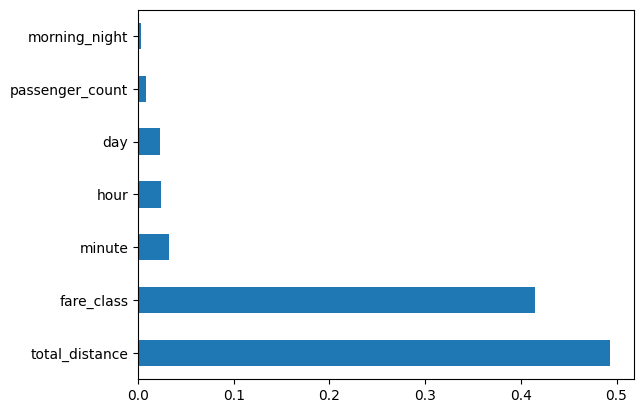

In [27]:
feature = pd.Series(model.feature_importances_,index=x.columns)
feature.nlargest(7).plot(kind='barh')

In [28]:
import xgboost

In [29]:
regressor = xgboost.XGBRegressor()

In [30]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
pred_xg=regressor.predict(x_test)

C:\Users\AJAY\anaconda3\envs\newyork\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


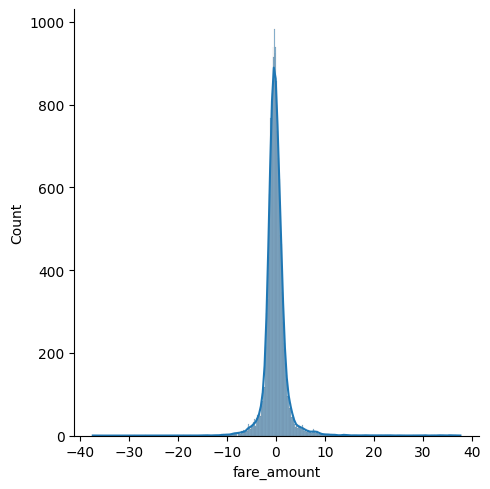

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(y_test-pred_xg,kde=True)

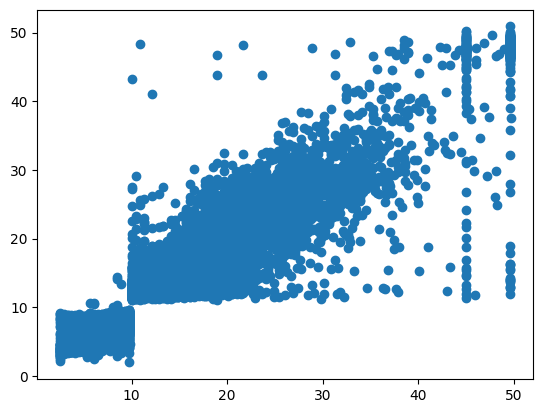

In [33]:
plt.scatter(y_test,pred_xg)

In [38]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [39]:
print('mae : ',metrics.mean_absolute_error(y_test,pred_xg))
print('mse : ',metrics.mean_squared_error(y_test,pred_xg))
print('rmse : ',np.sqrt(metrics.mean_squared_error(y_test,pred_xg)))
print('r squared : ',metrics.r2_score(y_test,pred_xg))

mae :  1.390653525996407
mse :  6.451429145191917
rmse :  2.5399663669410897
r squared :  0.8837730571748782


In [40]:
rf=RandomForestRegressor()

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 120, num = 12)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [42]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf 
              }
rf_random = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [43]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=110; total time=  11.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=110; total time=  12.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=110; total time=  11.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=110; total time=  11.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=110; total time=  11.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   9.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   9.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 110,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 25}

In [46]:
pred_rf=rf_random.predict(x_test)

In [ ]:
sns.histplot(y_test-pred_rf,kde=True)

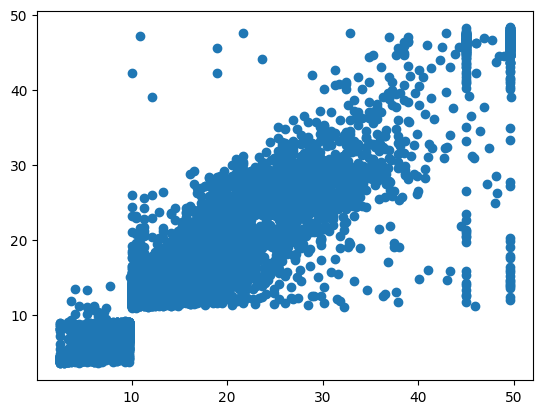

In [48]:
plt.scatter(y_test,pred_rf)

In [52]:
print('mae : ',metrics.mean_absolute_error(y_test,pred_rf))
print('mse : ',metrics.mean_squared_error(y_test,pred_rf))
print('rmse : ',np.sqrt(metrics.mean_squared_error(y_test,pred_rf)))
print('r squared : ',metrics.r2_score(y_test,pred_rf))

mae :  1.4049195359693203
mse :  6.383177854812969
rmse :  2.526495172133319
r squared :  0.8850026512146


<Axes: xlabel='fare_amount', ylabel='Count'>

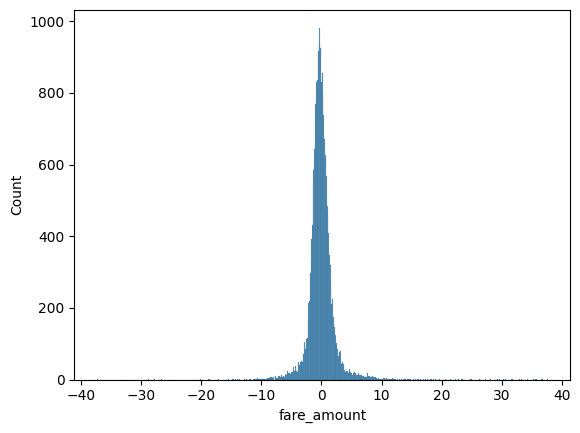

In [53]:
sns.histplot(y_test-pred_xg)